In [282]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data


In [283]:
df = pd.read_csv('salary-data-clean.csv')
df.head()

,job title,salary estimate,job description,rating,company name,location,size,founded,type of ownership,industry,sector,revenue,min_salary,max_salary,avg_salary,company_txt,job_state,age,python,R,spark,aws,cloud,excel
0,Data Scientist 2,$52K - $95K,description\ndigital health and analytics with...,3.9,Humana,"Louisville, KY",10000+ Employees,1961,Company - Public,Insurance Carriers,Insurance,$10+ billion (USD),52,95,73.5,Humana,KY,59,1,0,1,0,0,0
1,Lead Data Scientist,$94K - $155K,description\nthe lead data scientist uses math...,3.9,Humana,"Boston, MA",10000+ Employees,1961,Company - Public,Insurance Carriers,Insurance,$10+ billion (USD),94,155,124.5,Humana,MA,59,0,0,0,0,0,0
2,Data Scientist - Nutrisystem,$90K - $148K,description/responsibilities,2.7,Tivity Health,"Fort Washington, PA",201 to 500 Employees,1981,Company - Public,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,90,148,119.0,Tivity Health,PA,39,0,0,0,0,0,0
3,Data Scientist,$74K - $123K,data scientist\n\n\n\nlocation\n\n\n\natlanta ...,2.6,Purchasing Power,"Atlanta, GA",201 to 500 Employees,2001,Company - Private,Financial Transaction Processing,Finance,$100 to $500 million (USD),74,123,98.5,Purchasing Power,GA,19,0,0,0,0,0,0
4,Data Analyst,$36K - $65K,description:,4.1,Conservice,"Logan, UT",1001 to 5000 Employees,2000,Company - Private,Utilities,"Oil, Gas, Energy & Utilities",$50 to $100 million (USD),36,65,50.5,Conservice,UT,20,0,0,0,0,0,0


In [284]:
cols_to_drop = df.loc[:, (df == -1).all() | (df == 0).all()]
df.drop(cols_to_drop, inplace=True, axis=1)

## Extra Data Cleaning
Here we fix the title of the jobs, we also add a column name *seniority* that shows whether the job title is senior or not. 

In [285]:
def fix_title(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'research' in title.lower():
        return 'research scientist'
    else:
        return 'na'
    
def seniority(title):
    if 'senior' in title.lower() or 'snr' in title.lower() or 'sr' in title.lower() or 'manager' in title.lower() or\
    'director' in title.lower() or 'principle' in title.lower() or 'leader' in title.lower():
        return 'senior'
    elif 'junior' in title.lower() or 'jr' in title.lower() or 'intern' in title.lower():
        return 'junior'
    else:
        return 'na'        

In [286]:
df['job_title'] = df['job title'].apply(fix_title)
df['job_title'].value_counts()

data scientist        548
data analyst          143
data engineer          72
na                     66
mle                    22
research scientist     21
manager                16
director               12
Name: job_title, dtype: int64

In [287]:
df['job title'].sample(20)

330                            Machine Learning Engineer
571                                       Data Scientist
388        Senior Data Analyst, Direct-to-Consumer (DTC)
444    Senior Scientist/Associate Director, Chemical ...
712                                       Data Scientist
121                                Senior Data Scientist
477                                       Data Scientist
520                                         Data Analyst
804                                       Data Scientist
132                                       Data Scientist
684                          Senior Product Data Analyst
471                              Data Science Ontologist
612                                       Data Scientist
365                        Business Intelligence Analyst
57                                        Data Scientist
719                   Marketing Analytics Data Scientist
348                                        Data Engineer
691                           S

In [288]:
df['seniority'] = df['job title'].apply(seniority)
df['seniority'].value_counts()

na        744
senior    149
junior      7
Name: seniority, dtype: int64

In [289]:
df.head()

,job title,salary estimate,job description,rating,company name,location,size,founded,type of ownership,industry,sector,revenue,min_salary,max_salary,avg_salary,company_txt,job_state,age,python,R,spark,aws,cloud,job_title,seniority
0,Data Scientist 2,$52K - $95K,description\ndigital health and analytics with...,3.9,Humana,"Louisville, KY",10000+ Employees,1961,Company - Public,Insurance Carriers,Insurance,$10+ billion (USD),52,95,73.5,Humana,KY,59,1,0,1,0,0,data scientist,na
1,Lead Data Scientist,$94K - $155K,description\nthe lead data scientist uses math...,3.9,Humana,"Boston, MA",10000+ Employees,1961,Company - Public,Insurance Carriers,Insurance,$10+ billion (USD),94,155,124.5,Humana,MA,59,0,0,0,0,0,data scientist,na
2,Data Scientist - Nutrisystem,$90K - $148K,description/responsibilities,2.7,Tivity Health,"Fort Washington, PA",201 to 500 Employees,1981,Company - Public,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,90,148,119.0,Tivity Health,PA,39,0,0,0,0,0,data scientist,na
3,Data Scientist,$74K - $123K,data scientist\n\n\n\nlocation\n\n\n\natlanta ...,2.6,Purchasing Power,"Atlanta, GA",201 to 500 Employees,2001,Company - Private,Financial Transaction Processing,Finance,$100 to $500 million (USD),74,123,98.5,Purchasing Power,GA,19,0,0,0,0,0,data scientist,na
4,Data Analyst,$36K - $65K,description:,4.1,Conservice,"Logan, UT",1001 to 5000 Employees,2000,Company - Private,Utilities,"Oil, Gas, Energy & Utilities",$50 to $100 million (USD),36,65,50.5,Conservice,UT,20,0,0,0,0,0,data analyst,na


We now drop the extra columns

We find the length of job description for each job.

In [290]:
df['desc_len'] = df['job description'].apply(lambda x: len(x))
df['desc_len']

0      3525
1      2220
2        28
3       121
4        12
       ... 
895       9
896     410
897    5338
898       5
899     585
Name: desc_len, Length: 900, dtype: int64

## Univariate Analysis

In [291]:
df.describe()

,rating,founded,min_salary,max_salary,avg_salary,age,python,R,spark,aws,cloud,desc_len
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,3.431556,1621.677778,92.807778,153.354444,123.081111,27.622222,0.216667,0.001111,0.068889,0.082222,0.080000,1270.541111
std,1.515021,769.993478,27.590719,43.532376,35.329446,36.280264,0.412203,0.033333,0.253406,0.274856,0.271444,1791.620384
min,-1.000000,-1.000000,33.000000,59.000000,46.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,3.375000,1923.750000,65.000000,111.000000,87.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,3.800000,1994.000000,94.000000,158.000000,124.250000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,349.000000
75%,4.200000,2008.000000,111.000000,186.000000,148.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2413.250000
max,5.000000,2020.000000,145.000000,239.000000,192.000000,203.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9654.000000


We want to see the histogram of our numerical variables.

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job title          900 non-null    object 
 1   salary estimate    900 non-null    object 
 2   job description    900 non-null    object 
 3   rating             900 non-null    float64
 4   company name       900 non-null    object 
 5   location           900 non-null    object 
 6   size               900 non-null    object 
 7   founded            900 non-null    int64  
 8   type of ownership  900 non-null    object 
 9   industry           900 non-null    object 
 10  sector             900 non-null    object 
 11  revenue            900 non-null    object 
 12  min_salary         900 non-null    int64  
 13  max_salary         900 non-null    int64  
 14  avg_salary         900 non-null    float64
 15  company_txt        900 non-null    object 
 16  job_state          900 non

In [293]:
cols_to_drop = ['job title', 'salary estimate', 'job description', 'company name', 'location', 'founded']

In [294]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
num_cols

['rating',
 'founded',
 'min_salary',
 'max_salary',
 'avg_salary',
 'age',
 'python',
 'R',
 'spark',
 'aws',
 'cloud',
 'desc_len']

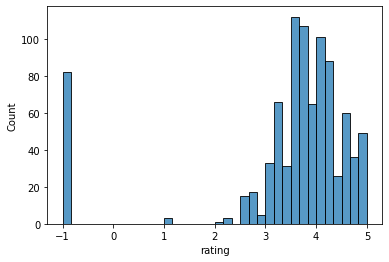

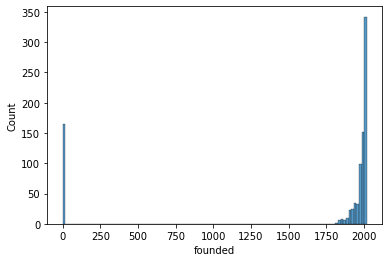

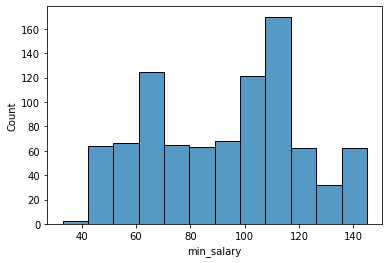

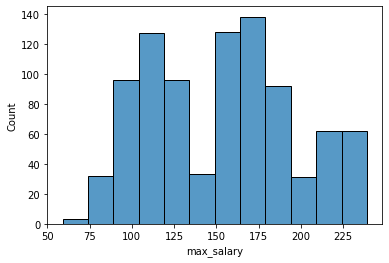

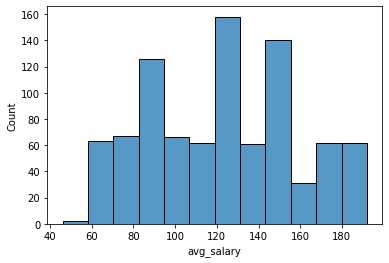

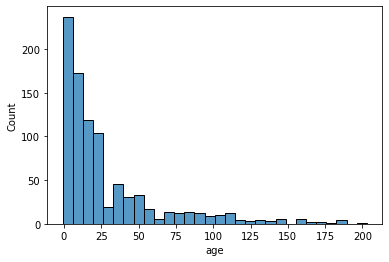

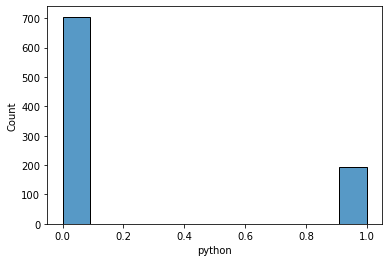

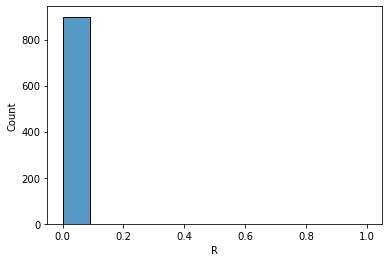

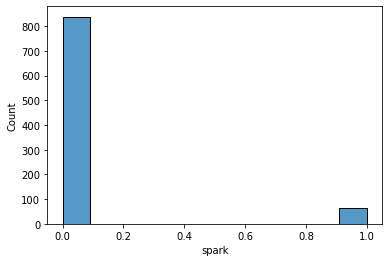

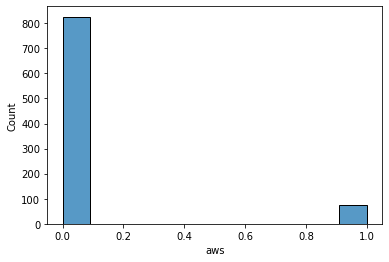

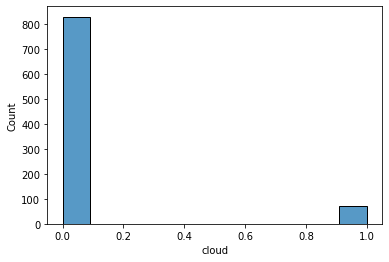

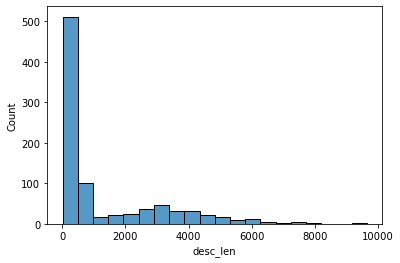

In [295]:
for col in num_cols:
    plt.figure()
    sns.histplot(x=col, data=df)

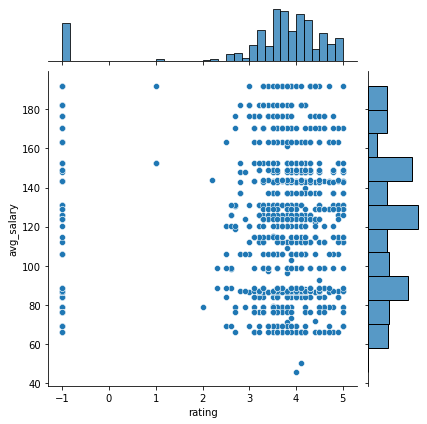

In [296]:
sns.jointplot(x='rating', y='avg_salary', data=df);

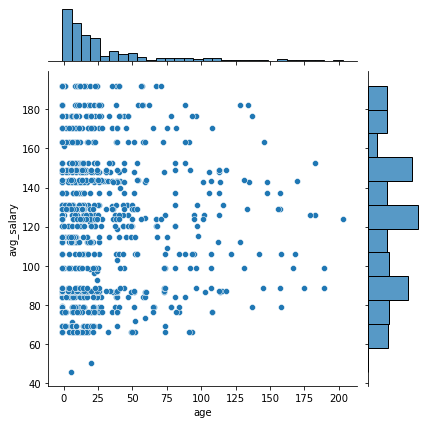

In [297]:
sns.jointplot(x='age', y='avg_salary', data=df);

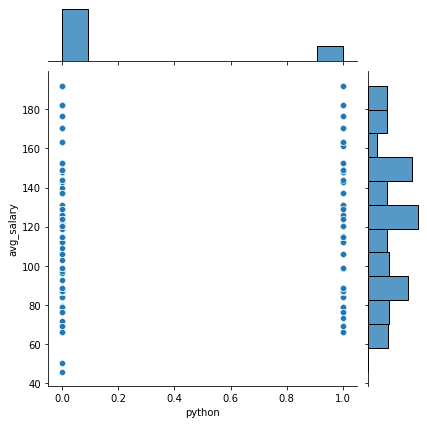

In [298]:
sns.jointplot(x='python', y='avg_salary', data=df);

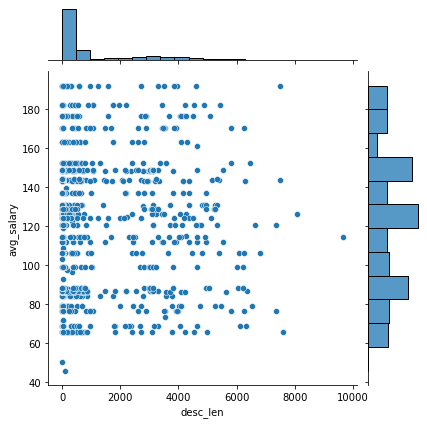

In [299]:
sns.jointplot(x='desc_len', y='avg_salary', data=df);

In [300]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['job title',
 'salary estimate',
 'job description',
 'company name',
 'location',
 'size',
 'type of ownership',
 'industry',
 'sector',
 'revenue',
 'company_txt',
 'job_state',
 'job_title',
 'seniority']

We now take a look at correlations between numerical variables.

The above chart shows that there is relatively high correlation between *rating* and 'age', also between 'desc_len' and 'age'. 

Now we visualize categorical variables.

graph for size, total=9


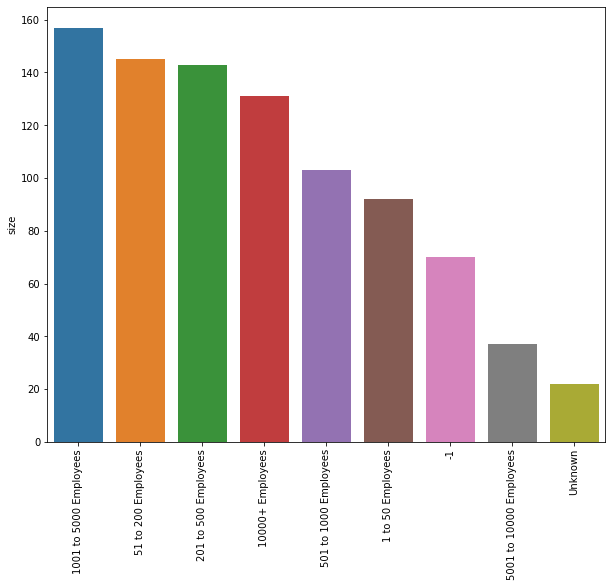

graph for type of ownership, total=12


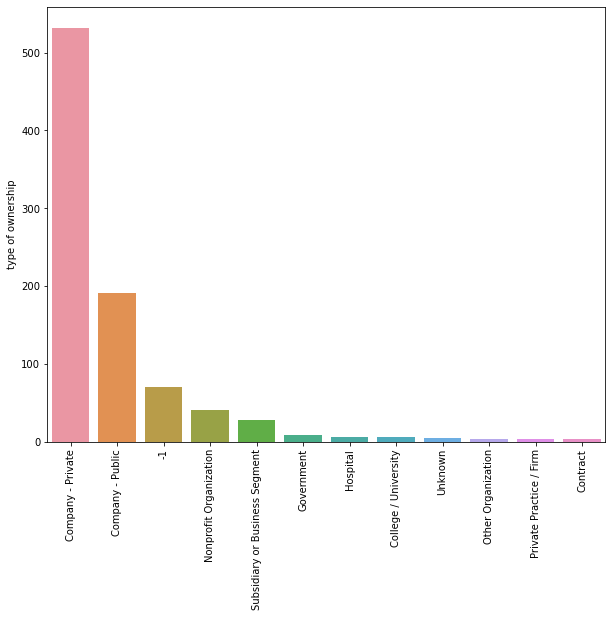

graph for sector, total=23


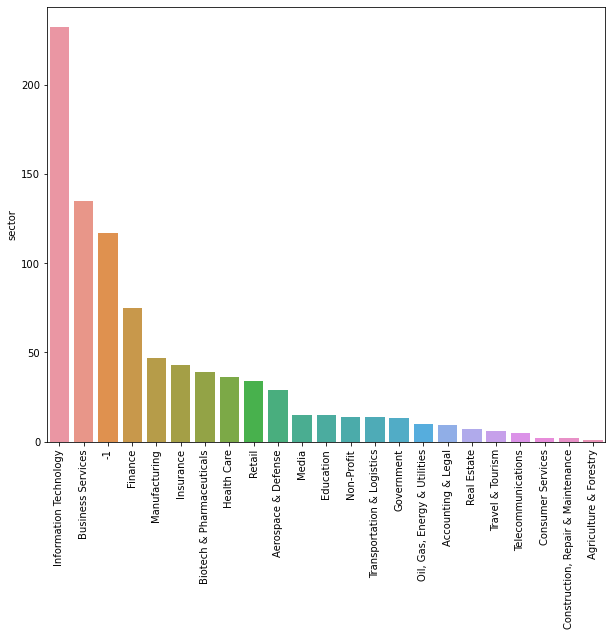

graph for seniority, total=3


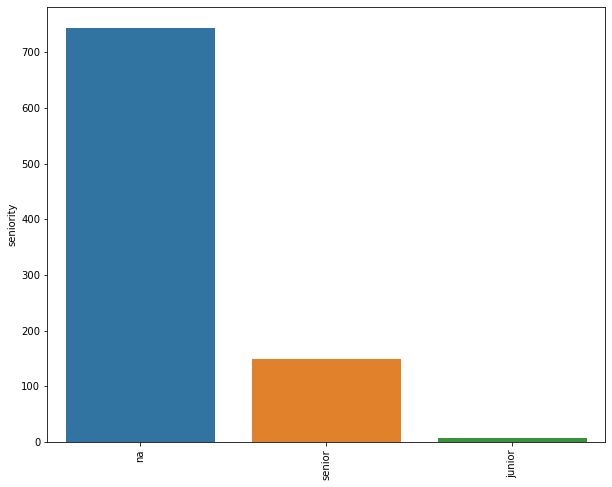

graph for job_state, total=47


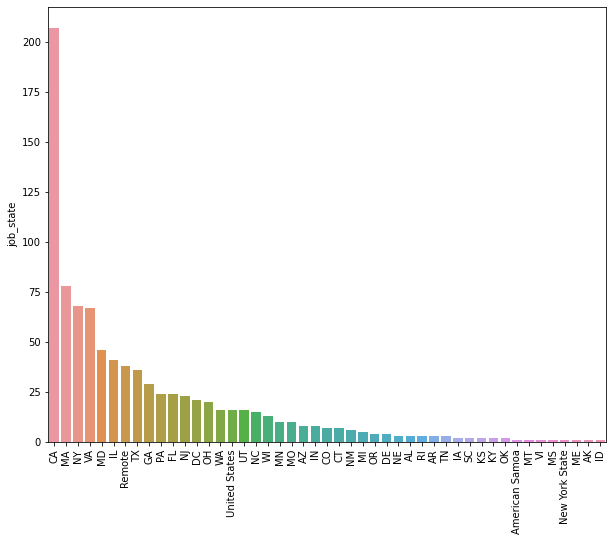

graph for revenue, total=14


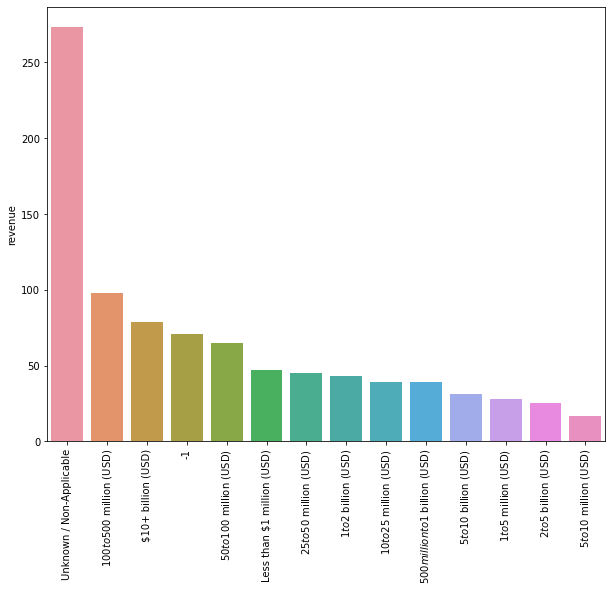

In [301]:
df_cat = df[['size', 'type of ownership', 'sector', 'seniority', 'job_state', 'revenue']]
for name in df_cat.columns:
    cat_num = df_cat[name].value_counts()
    print(f'graph for {name}, total={len(cat_num)}')
    plt.figure(figsize=(10, 8))
    graph = sns.barplot(x=cat_num.index, y=cat_num)
    graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
    plt.show()

In [302]:
mask = df['size'] == 'Unknown'
df.loc[mask, 'size'] = '-1'

mask = df['type of ownership'] == 'Unknown'
df.loc[mask, 'type of ownership'] = '-1'

mask = df['revenue'] == 'Unknown / Non-Applicable'
df.loc[mask, 'revenue']='-1'


For better visualisation in high-dimensional variables, we select top 20 variables and visualise those variables.

graph for company_txt, total=20


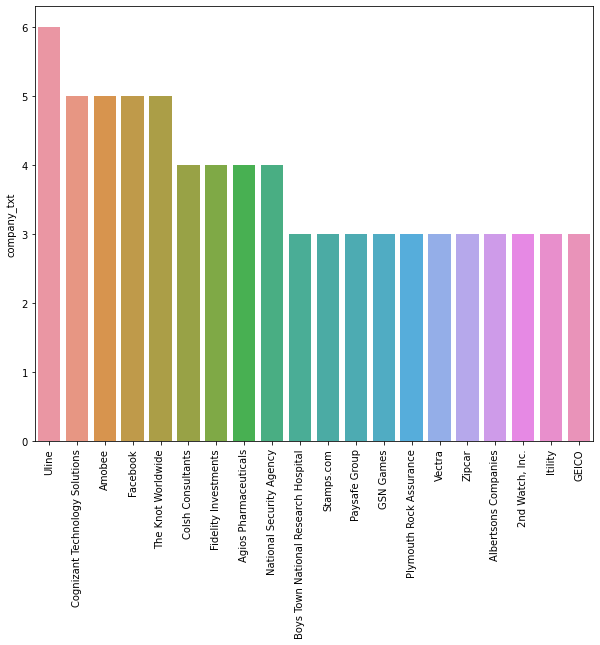

graph for location, total=20


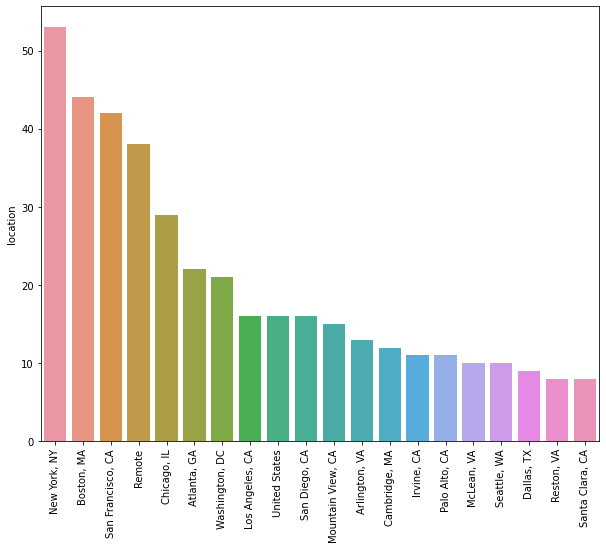

In [303]:
df_cat = df[['company_txt', 'location']]
for name in df_cat.columns:
    cat_num = df_cat[name].value_counts()[:20]
    print(f'graph for {name}, total={len(cat_num)}')
    plt.figure(figsize=(10, 8))
    graph = sns.barplot(x=cat_num.index, y=cat_num)
    graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
    plt.show()

In [304]:
df.head()

,job title,salary estimate,job description,rating,company name,location,size,founded,type of ownership,industry,sector,revenue,min_salary,max_salary,avg_salary,company_txt,job_state,age,python,R,spark,aws,cloud,job_title,seniority,desc_len
0,Data Scientist 2,$52K - $95K,description\ndigital health and analytics with...,3.9,Humana,"Louisville, KY",10000+ Employees,1961,Company - Public,Insurance Carriers,Insurance,$10+ billion (USD),52,95,73.5,Humana,KY,59,1,0,1,0,0,data scientist,na,3525
1,Lead Data Scientist,$94K - $155K,description\nthe lead data scientist uses math...,3.9,Humana,"Boston, MA",10000+ Employees,1961,Company - Public,Insurance Carriers,Insurance,$10+ billion (USD),94,155,124.5,Humana,MA,59,0,0,0,0,0,data scientist,na,2220
2,Data Scientist - Nutrisystem,$90K - $148K,description/responsibilities,2.7,Tivity Health,"Fort Washington, PA",201 to 500 Employees,1981,Company - Public,Health Care Services & Hospitals,Health Care,-1,90,148,119.0,Tivity Health,PA,39,0,0,0,0,0,data scientist,na,28
3,Data Scientist,$74K - $123K,data scientist\n\n\n\nlocation\n\n\n\natlanta ...,2.6,Purchasing Power,"Atlanta, GA",201 to 500 Employees,2001,Company - Private,Financial Transaction Processing,Finance,$100 to $500 million (USD),74,123,98.5,Purchasing Power,GA,19,0,0,0,0,0,data scientist,na,121
4,Data Analyst,$36K - $65K,description:,4.1,Conservice,"Logan, UT",1001 to 5000 Employees,2000,Company - Private,Utilities,"Oil, Gas, Energy & Utilities",$50 to $100 million (USD),36,65,50.5,Conservice,UT,20,0,0,0,0,0,data analyst,na,12


In [305]:
df.columns

Index(['job title', 'salary estimate', 'job description', 'rating',
       'company name', 'location', 'size', 'founded', 'type of ownership',
       'industry', 'sector', 'revenue', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'age', 'python', 'R', 'spark',
       'aws', 'cloud', 'job_title', 'seniority', 'desc_len'],
      dtype='object')

In [306]:
to_remove = ['job title', 'salary estimate', 'job description', 'company name', 'location', 
            'founded', 'industry', 'min_salary', 'max_salary', 'company_txt']

df.drop(df[to_remove], axis=1, inplace=True)

In [307]:
df.head()

,rating,size,type of ownership,sector,revenue,avg_salary,job_state,age,python,R,spark,aws,cloud,job_title,seniority,desc_len
0,3.9,10000+ Employees,Company - Public,Insurance,$10+ billion (USD),73.5,KY,59,1,0,1,0,0,data scientist,na,3525
1,3.9,10000+ Employees,Company - Public,Insurance,$10+ billion (USD),124.5,MA,59,0,0,0,0,0,data scientist,na,2220
2,2.7,201 to 500 Employees,Company - Public,Health Care,-1,119.0,PA,39,0,0,0,0,0,data scientist,na,28
3,2.6,201 to 500 Employees,Company - Private,Finance,$100 to $500 million (USD),98.5,GA,19,0,0,0,0,0,data scientist,na,121
4,4.1,1001 to 5000 Employees,Company - Private,"Oil, Gas, Energy & Utilities",$50 to $100 million (USD),50.5,UT,20,0,0,0,0,0,data analyst,na,12


In [309]:
df_pivots = df[['rating', 'sector', 'revenue', 'python', 'R', 
                'spark', 'aws', 'cloud', 'type of ownership', 'avg_salary']]

for i in df_pivots.columns[:-1]:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values(by='avg_salary', ascending=False))

rating
        avg_salary
rating            
 1.0    165.666667
 2.2    144.000000
 3.0    138.333333
 2.8    136.562500
 4.4    136.519231
 4.3    133.488095
 4.8    128.550000
 3.3    127.474359
 3.8    126.279661
 3.7    125.937500
 3.9    123.738462
 3.5    123.316327
 4.2    123.293478
 4.9    123.083333
 5.0    122.919355
 4.1    122.701923
-1.0    122.591463
 4.5    121.384615
 3.4    121.016129
 3.1    119.452381
 4.0    118.867347
 2.7    118.833333
 3.6    117.206349
 3.2    115.018519
 4.7    114.531250
 4.6    112.404762
 2.9    108.800000
 2.6    107.312500
 2.5    104.285714
 2.3     93.750000
 2.0     79.000000
sector
                                    avg_salary
sector                                        
Real Estate                         129.928571
Education                           128.766667
Media                               128.700000
Accounting & Legal                  127.388889
Information Technology              127.308190
Health Care                   

In [310]:
df = pd.get_dummies(df)
df.head()

,rating,avg_salary,age,python,R,spark,aws,cloud,desc_len,size_-1,size_1 to 50 Employees,size_10000+ Employees,size_1001 to 5000 Employees,size_201 to 500 Employees,size_5001 to 10000 Employees,size_501 to 1000 Employees,size_51 to 200 Employees,type of ownership_-1,type of ownership_College / University,type of ownership_Company - Private,type of ownership_Company - Public,type of ownership_Contract,type of ownership_Government,type of ownership_Hospital,type of ownership_Nonprofit Organization,type of ownership_Other Organization,type of ownership_Private Practice / Firm,type of ownership_Subsidiary or Business Segment,sector_-1,sector_Accounting & Legal,sector_Aerospace & Defense,sector_Agriculture & Forestry,sector_Biotech & Pharmaceuticals,sector_Business Services,"sector_Construction, Repair & Maintenance",sector_Consumer Services,sector_Education,sector_Finance,sector_Government,sector_Health Care,sector_Information Technology,sector_Insurance,sector_Manufacturing,sector_Media,sector_Non-Profit,"sector_Oil, Gas, Energy & Utilities",sector_Real Estate,sector_Retail,sector_Telecommunications,sector_Transportation & Logistics,sector_Travel & Tourism,revenue_$1 to $2 billion (USD),revenue_$1 to $5 million (USD),revenue_$10 to $25 million (USD),revenue_$10+ billion (USD),revenue_$100 to $500 million (USD),revenue_$2 to $5 billion (USD),revenue_$25 to $50 million (USD),revenue_$5 to $10 billion (USD),revenue_$5 to $10 million (USD),revenue_$50 to $100 million (USD),revenue_$500 million to $1 billion (USD),revenue_-1,revenue_Less than $1 million (USD),job_state_AK,job_state_AL,job_state_AR,job_state_AZ,job_state_American Samoa,job_state_CA,job_state_CO,job_state_CT,job_state_DC,job_state_DE,job_state_FL,job_state_GA,job_state_IA,job_state_ID,job_state_IL,job_state_IN,job_state_KS,job_state_KY,job_state_MA,job_state_MD,job_state_ME,job_state_MI,job_state_MN,job_state_MO,job_state_MS,job_state_MT,job_state_NC,job_state_NE,job_state_NJ,job_state_NM,job_state_NY,job_state_New York State,job_state_OH,job_state_OK,job_state_OR,job_state_PA,job_state_RI,job_state_Remote,job_state_SC,job_state_TN,job_state_TX,job_state_UT,job_state_United States,job_state_VA,job_state_VI,job_state_WA,job_state_WI,job_title_data analyst,job_title_data engineer,job_title_data scientist,job_title_director,job_title_manager,job_title_mle,job_title_na,job_title_research scientist,seniority_junior,seniority_na,seniority_senior
0,3.9,73.5,59,1,0,1,0,0,3525,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,3.9,124.5,59,0,0,0,0,0,2220,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,2.7,119.0,39,0,0,0,0,0,28,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,2.6,98.5,19,0,0,0,0,0,121,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,4.1,50.5,20,0,0,0,0,0,12,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [311]:
to_remove = ['size_-1', 'type of ownership_-1', 'sector_-1', 'revenue_-1', 'job_title_na', 'seniority_na']
df.drop(to_remove, axis=1, inplace=True)

In [312]:
df.head()

,rating,avg_salary,age,python,R,spark,aws,cloud,desc_len,size_1 to 50 Employees,size_10000+ Employees,size_1001 to 5000 Employees,size_201 to 500 Employees,size_5001 to 10000 Employees,size_501 to 1000 Employees,size_51 to 200 Employees,type of ownership_College / University,type of ownership_Company - Private,type of ownership_Company - Public,type of ownership_Contract,type of ownership_Government,type of ownership_Hospital,type of ownership_Nonprofit Organization,type of ownership_Other Organization,type of ownership_Private Practice / Firm,type of ownership_Subsidiary or Business Segment,sector_Accounting & Legal,sector_Aerospace & Defense,sector_Agriculture & Forestry,sector_Biotech & Pharmaceuticals,sector_Business Services,"sector_Construction, Repair & Maintenance",sector_Consumer Services,sector_Education,sector_Finance,sector_Government,sector_Health Care,sector_Information Technology,sector_Insurance,sector_Manufacturing,sector_Media,sector_Non-Profit,"sector_Oil, Gas, Energy & Utilities",sector_Real Estate,sector_Retail,sector_Telecommunications,sector_Transportation & Logistics,sector_Travel & Tourism,revenue_$1 to $2 billion (USD),revenue_$1 to $5 million (USD),revenue_$10 to $25 million (USD),revenue_$10+ billion (USD),revenue_$100 to $500 million (USD),revenue_$2 to $5 billion (USD),revenue_$25 to $50 million (USD),revenue_$5 to $10 billion (USD),revenue_$5 to $10 million (USD),revenue_$50 to $100 million (USD),revenue_$500 million to $1 billion (USD),revenue_Less than $1 million (USD),job_state_AK,job_state_AL,job_state_AR,job_state_AZ,job_state_American Samoa,job_state_CA,job_state_CO,job_state_CT,job_state_DC,job_state_DE,job_state_FL,job_state_GA,job_state_IA,job_state_ID,job_state_IL,job_state_IN,job_state_KS,job_state_KY,job_state_MA,job_state_MD,job_state_ME,job_state_MI,job_state_MN,job_state_MO,job_state_MS,job_state_MT,job_state_NC,job_state_NE,job_state_NJ,job_state_NM,job_state_NY,job_state_New York State,job_state_OH,job_state_OK,job_state_OR,job_state_PA,job_state_RI,job_state_Remote,job_state_SC,job_state_TN,job_state_TX,job_state_UT,job_state_United States,job_state_VA,job_state_VI,job_state_WA,job_state_WI,job_title_data analyst,job_title_data engineer,job_title_data scientist,job_title_director,job_title_manager,job_title_mle,job_title_research scientist,seniority_junior,seniority_senior
0,3.9,73.5,59,1,0,1,0,0,3525,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,3.9,124.5,59,0,0,0,0,0,2220,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2.7,119.0,39,0,0,0,0,0,28,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2.6,98.5,19,0,0,0,0,0,121,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4.1,50.5,20,0,0,0,0,0,12,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [313]:
dfCorr = df.corr()
highcorr = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
s = highcorr.abs().unstack()
s.dropna()

python                                  desc_len                                  0.665596
desc_len                                python                                    0.665596
size_10000+ Employees                   revenue_$10+ billion (USD)                0.673631
type of ownership_College / University  sector_Education                          0.522609
type of ownership_Company - Private     type of ownership_Company - Public        0.624059
type of ownership_Company - Public      type of ownership_Company - Private       0.624059
type of ownership_Government            sector_Government                         0.736586
type of ownership_Hospital              job_state_NE                              0.705923
sector_Education                        type of ownership_College / University    0.522609
sector_Government                       type of ownership_Government              0.736586
revenue_$10+ billion (USD)              size_10000+ Employees                     0.673631

In [314]:
print(df['sector_Education'].corr(df['avg_salary']))
print(df['type of ownership_College / University'].corr(df['avg_salary']))

0.02096290610791704
-0.004635094908239616


In [315]:
print(df['type of ownership_Government'].corr(df['avg_salary']))
print(df['sector_Government'].corr(df['avg_salary']))

-0.029959324569470185
-0.036410068332178136


In [316]:
to_remove = ['type of ownership_College / University', 'type of ownership_Government']
df.drop(to_remove, axis=1, inplace=True)

In [317]:
pd.pivot_table(df_pivots, index='revenue', columns=['python'], values=['avg_salary'], aggfunc='count')

avg_salary    
python                                    0   1
revenue                                        
$1 to $2 billion (USD)                   36   7
$1 to $5 million (USD)                   19   9
$10 to $25 million (USD)                 31   8
$10+ billion (USD)                       53  26
$100 to $500 million (USD)               83  15
$2 to $5 billion (USD)                   19   6
$25 to $50 million (USD)                 32  13
$5 to $10 billion (USD)                  18  13
$5 to $10 million (USD)                  10   7
$50 to $100 million (USD)                53  12
$500 million to $1 billion (USD)         34   5
-1                                      285  59
Less than $1 million (USD)               32  15

In [318]:
df.to_csv('data-eda.csv', index=False)